# 定义
具身智能(Embodied AI)：有身体并支持物理交互的智能体，如家用服务机器人、无人车等。 —— “身体力行”
Embodied AI is AI that controls a physical “thing,” like a robot arm or an autonomous vehicle.

1950年，图灵在他的论文 ——《Computing Machinery and Intelligence》中首次提出了具身智能的概念。在之后的几十年里，大家都觉得这是一个很重要的概念，但具身智能并没有取得很大的进展，因为当时的技术还不足以支撑其发展。
> We may hope that machines will eventually compete with men in all purely intellectual fields. But which are the best ones to start with? Even this is a difficult decision. Many people think that a very abstract activity, like the playing of chess, would be best. It can also be maintained that it is best to provide the machine with the best sense organs that money can buy, and then teach it to understand and speak English. This process could follow the normal teaching of a child. Things would be pointed out and named, etc. Again I do not know what the right answer is, but I think both approaches should be tried. ——Alan Turing

上面图灵所说的下围棋和使机器具备感官、能说英语、能学习就分别代表了非具身智能和具身智能，而两种智能形态的此消彼长也贯穿了人工智能研究这跌宕起伏的七十年。

李飞飞：“具身的含义不是身体本身，而是与环境交互以及在环境中做事的整体需求和功能。”
refer to: https://zhuanlan.zhihu.com/p/620342675

具身智能（Embodied Intelligence）指的是机器人或智能体通过感知、理解和交互来适应环境，并执行任务的能力。与传统的基于规则或符号的人工智能不同，具身智能强调将感知和行动相结合，使智能体能够更好地理解其周围的环境和与环境的互动。(https://zhuanlan.zhihu.com/p/669226987)

# 挑战

LLMs和VLMs在机器人领域落地效果并不好，其主要原因是这些模型欠缺真实物理世界的知识，导致其推理输出很难落地到实际机器人场景中。还有一部分原因是由于现有大模型主要进行语义推理和文本提示，而机器人需要的是可用的机器人运动指令，譬如机械臂末端位置指令或者底盘移动位置指令等，二者无法直接匹配

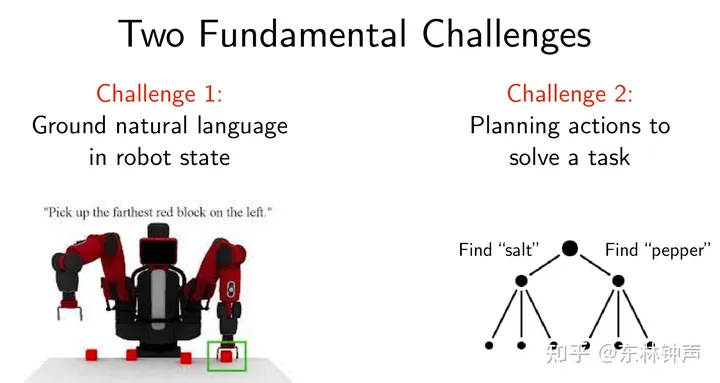

## 挑战1：Grounding
如何把自然语言转换成能够被机器人识别、处理的状态？

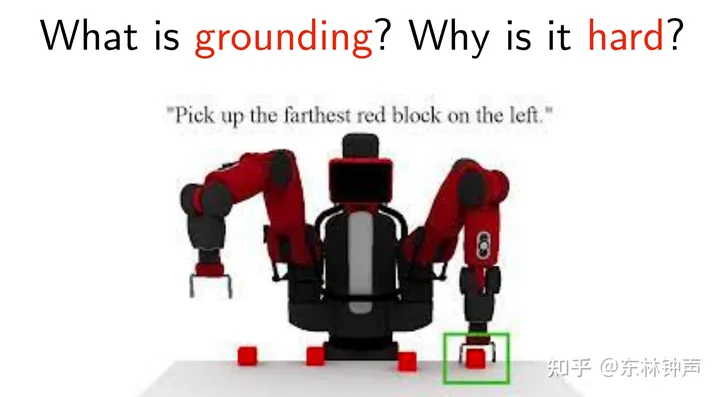
比如我想让机器人抓取位于桌子上最左边的红色方块，这里要解决定位到桌子、桌子上的物体、红色的方块、以及相对位置关系。如果用逻辑语言来表示，应该如下：
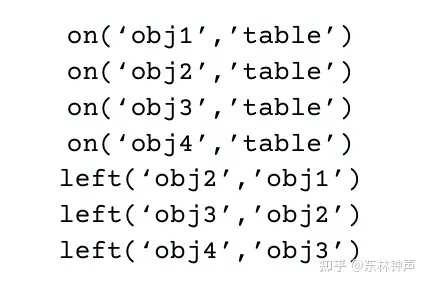
可以看到，其实这么简单的一句描述，想进行grounding也不是一个很简单的事情。

## 挑战2： Planning
如何规划合适的动作来完成任务？

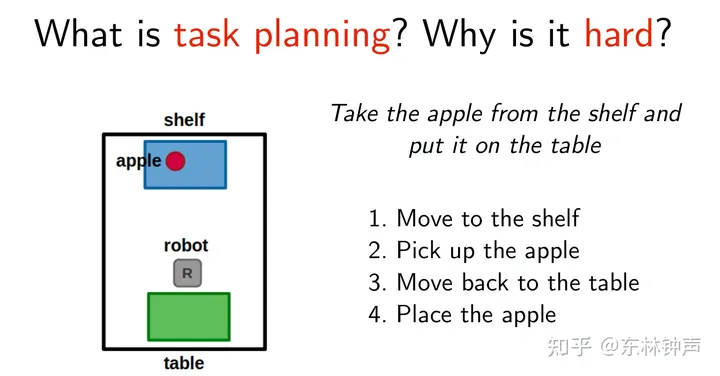
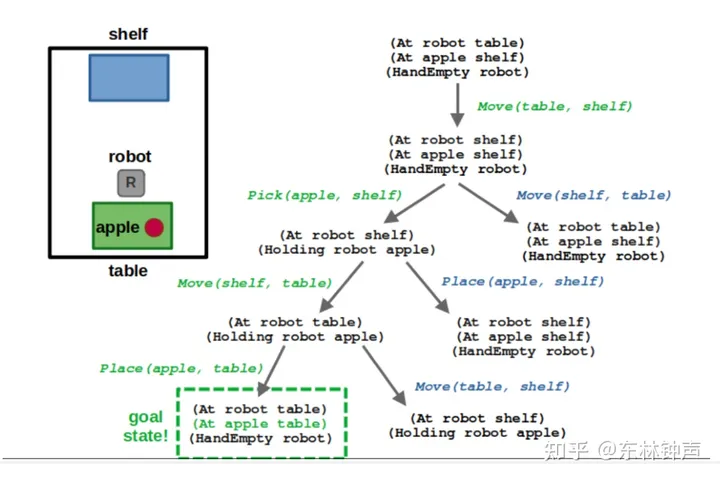


## SayCan为什么能够有效处理grounding和planning？
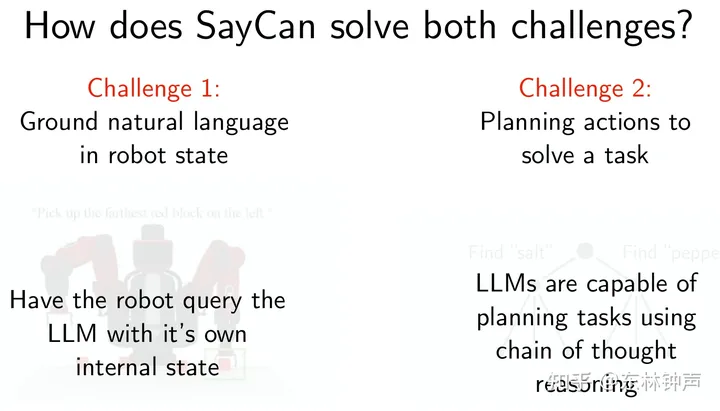
本质上是通过LLM的内在知识处理grouding，通过chain of thought进行任务规划。但是仍然存在问题：
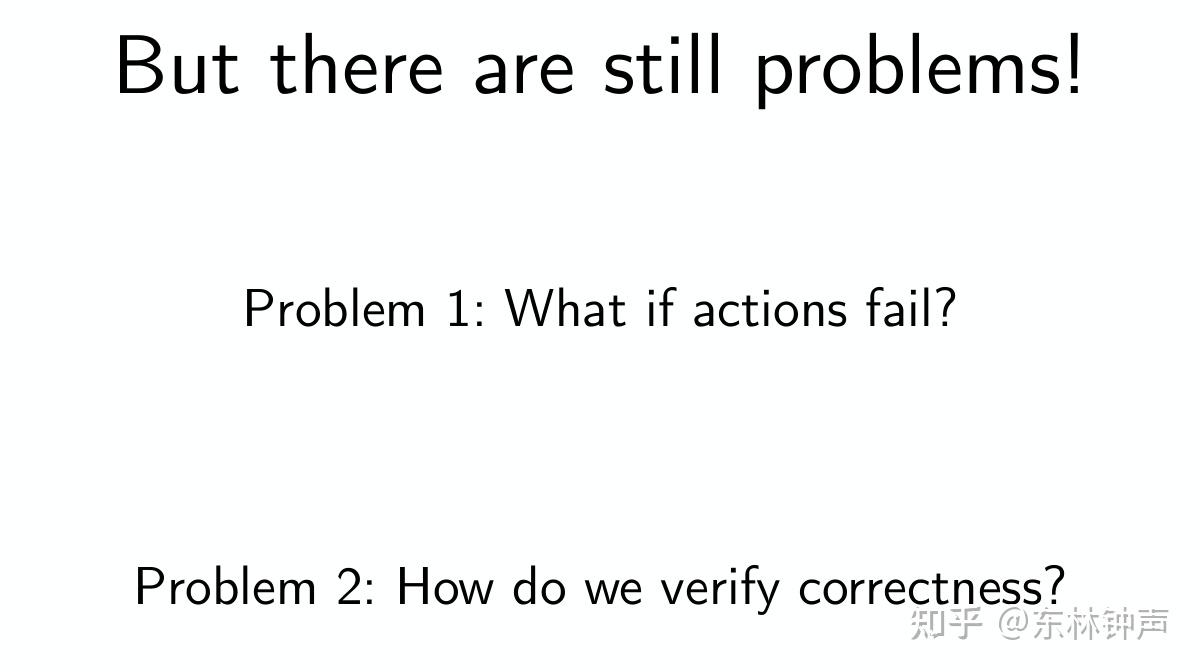

### 问题1：如何处理失败？
[Inner Monologue: Embodied Reasoning through Planning with Language Models](https://arxiv.org/abs/2207.05608)

Inner Monologue内心独白，通过让LLM构建一个闭环反馈系统，不断获取不同形式的反馈（场景描述、成功与否），来处理失败：
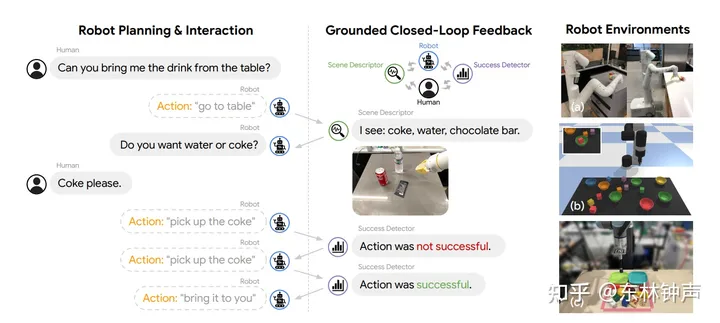

### 问题2：如何判断正确性？
[Code as Policies: Language Model Programs for Embodied Control](https://arxiv.org/abs/2209.07753)

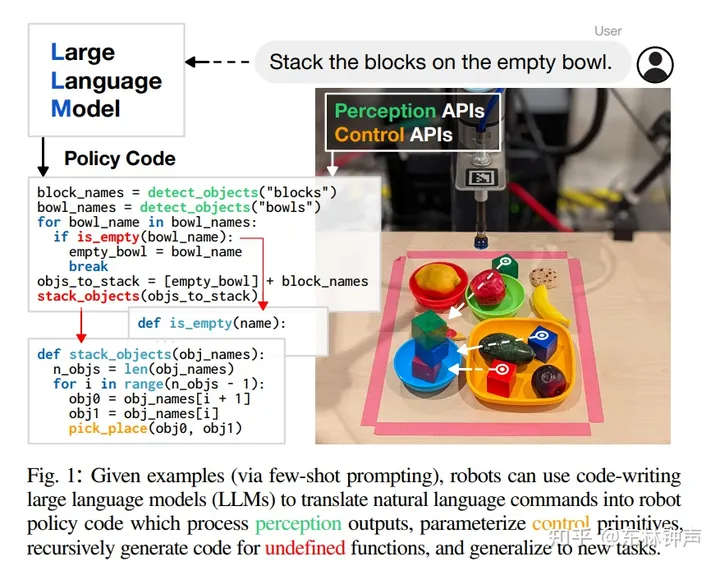
通过迭代生成代码的方式，对之前生成的代码（比如函数未定义等错误）进行修改，可以生成更加复杂、可靠的执行代码。

# High-Level & Low-Level
关于机器人控制层级有很多种分法，为方便理解大模型论文和机器人的结合点，在本文中将控制层级分为5级：

1. 任务级Task Level：我咖啡洒了，你能帮忙吗；
2. 技能级Skill Level：找到抹布、捡起抹布、移动抹布、放下抹布；
3. 动作级Motion Level：直线运动、圆弧运动、样条曲线运动、手抓开合；
4. 基元级Primitive Level：根据动作和机器人物理限制进行轨迹规划完毕之后插值生成的控制指令，包括目标位置、姿态、速度前馈、力矩前馈，一般周期要做到至少500Hz，常见的控制周期现在已经做到1000Hz以上。如果是力控制，这周期一般回到2000~4000hz;
5. 伺服级Servo Level：运行在伺服驱动器里的位置速度电流三环控制；

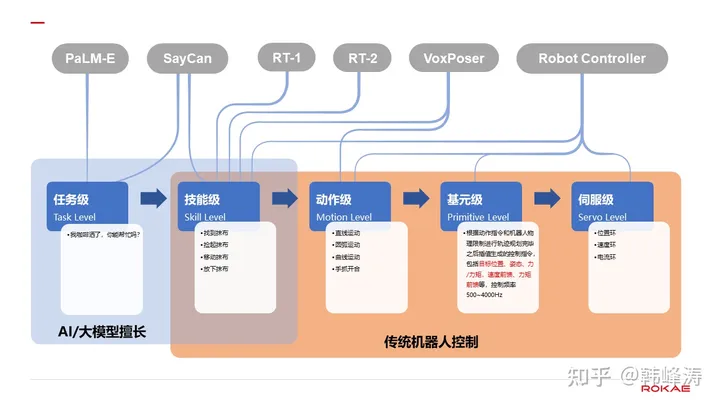

# 论文

| Paper | Github | Jupyter | Website | Team | Remark | Cited |
| :- | :-: | :-: | :-: | :-: | :- | :-: |
| [BC-Z: Zero-shot task generalization with robotic imitation learning](https://openreview.net/pdf?id=8kbp23tSGYv) | [github](https://github.com/google-research/tensor2robot/tree/master/research/bcz) | | [website](https://sites.google.com/view/bc-z/home) | [google](https://blog.research.google/2022/02/can-robots-follow-instructions-for-new.html) | [dataset](https://www.kaggle.com/datasets/google/bc-z-robot) | 299| 
| [PaLM-E: An embodied multimodal language model](https://palm-e.github.io/assets/palm-e.pdf) | [github](https://github.com/kyegomez/PALM-E)| | [website](https://palm-e.github.io/) | [Google](https://blog.research.google/2023/03/palm-e-embodied-multimodal-language.html) | [知乎](https://zhuanlan.zhihu.com/p/612536995) | 768 |
| [Do as i can, not as i say: Grounding language in robotic affordances](https://say-can.github.io/assets/palm_saycan.pdf) | [github](https://github.com/google-research/google-research/tree/master/saycan) | | [website](https://say-can.github.io/) | [Google](https://blog.research.google/2022/08/towards-helpful-robots-grounding.html) | | 857 |
| [Rt-1: Robotics transformer for real-world control at scale](https://robotics-transformer1.github.io/assets/rt1.pdf) | [github](https://github.com/google-research/robotics_transformer) | | [website](https://robotics-transformer1.github.io/) | [Google](https://blog.research.google/2022/12/rt-1-robotics-transformer-for-real.html) | | 370 |
| [Rt-2: Vision-language-action models transfer web knowledge to robotic control](https://robotics-transformer2.github.io/assets/rt2.pdf) | | |[website](https://robotics-transformer2.github.io/) | [Google](https://deepmind.google/discover/blog/rt-2-new-model-translates-vision-and-language-into-action/) | | 227 |
| [Learning Fine-Grained Bimanual Manipulation with Low-Cost Hardware](https://arxiv.org/abs/2304.13705) | [aloha](https://github.com/tonyzhaozh/aloha) | | [aloha](https://tonyzhaozh.github.io/aloha/) | | [ACT+Sim](https://github.com/tonyzhaozh/act) | 82
| [ALOHA 2: An enhanced low-cost hardware for bimanual teleoperation](https://aloha-2.github.io/assets/aloha2.pdf) | [aloha2](https://github.com/tonyzhaozh/aloha/tree/main/aloha2) | | [aloha-2](https://aloha-2.github.io/) | | [Sim](https://github.com/google-deepmind/mujoco_menagerie/tree/main/aloha/) 
| [Mobile ALOHA: Learning Bimanual Mobile Manipulation with Low-Cost Whole-Body Teleoperation](https://arxiv.org/abs/2401.02117) | [ML code](https://github.com/MarkFzp/act-plus-plus) | Stanford | [mobile-aloha](https://mobile-aloha.github.io/) | | [hardware code](https://github.com/MarkFzp/mobile-aloha) [datasets](https://drive.google.com/drive/folders/1FP5eakcxQrsHyiWBRDsMRvUfSxeykiDc) | 29
| [Universal Manipulation Interface: In-The-Wild Robot Teaching Without In-The-Wild Robots](https://umi-gripper.github.io/umi.pdf) | [github](https://github.com/real-stanford/universal_manipulation_interface) | | [website](https://umi-gripper.github.io/) | Stanford | | 3 |
| [What matters in learning from offline human demonstrations for robot manipulation](https://arxiv.org/abs/2108.03298) | [robomimic](https://github.com/ARISE-Initiative/robomimic) | | [website](https://robomimic.github.io/) | | | 228 |
| [RoboCat: A Self-Improving Generalist Agent for Robotic Manipulation](https://arxiv.org/abs/2306.11706) | [github](https://github.com/kyegomez/RoboCAT) | | | [Google](https://deepmind.google/discover/blog/robocat-a-self-improving-robotic-agent/) | | 0 |
| [Beyond pick-and-place: Tackling robotic stacking of diverse shapes](https://arxiv.org/abs/2110.06192) | [github](https://github.com/google-deepmind/rgb_stacking) | | | [Google](https://deepmind.google/discover/blog/stacking-our-way-to-more-general-robots/) | | 74 |
| [VoxPoser: Composable 3d value maps for robotic manipulation with language models](https://voxposer.github.io/voxposer.pdf) | [github](https://github.com/huangwl18/VoxPoser) | | [website](https://voxposer.github.io/) | Stanford 李飞飞团队 | | 118 |
| [ChatGPT for robotics: Design principles and model abilities](https://www.microsoft.com/en-us/research/uploads/prod/2023/02/ChatGPT___Robotics.pdf) | [github](https://github.com/microsoft/PromptCraft-Robotics) | | | [microsoft research](https://www.microsoft.com/en-us/research/group/autonomous-systems-group-robotics/articles/chatgpt-for-robotics/) | | 213 |
[CLIPort: What and Where Pathways for Robotic Manipulation](https://arxiv.org/abs/2109.12098) | [github](https://github.com/cliport/cliport) | | [website](https://cliport.github.io/) | NVIDIA | | 404 |
| [Where are we in the search for an artificial visual cortex for embodied intelligence?](https://arxiv.org/abs/2303.18240) | [github](https://github.com/facebookresearch/eai-vc) | | [website](https://eai-vc.github.io/) | facebook research | [dataset](https://github.com/facebookresearch/eai-vc/blob/main/cortexbench/DATASETS.md) | 57 |
| [R3M: A universal visual representation for robot manipulation](https://arxiv.org/abs/2203.12601) | [github](https://github.com/facebookresearch/r3m) | | [website](https://sites.google.com/view/robot-r3m) | Meta AI, Stanford University | | 283 |
[VIMA: General robot manipulation with multimodal prompts](https://vimalabs.github.io/assets/vima_paper.pdf) | [github](https://github.com/vimalabs/VIMA) | | [website](https://vimalabs.github.io/) | Stanford, NVIDIA | [dataset](https://huggingface.co/datasets/VIMA/VIMA-Data) | 111
| [Language-Driven Representation Learning for Robotics](https://arxiv.org/abs/2302.12766) | [voltron](https://github.com/siddk/voltron-robotics) | | | | | 59 |
| [A Generalist Agent](https://arxiv.org/abs/2205.06175) | [gato](https://github.com/OrigamiDream/gato) | | | [Google](https://deepmind.google/discover/blog/a-generalist-agent/) | | 640
| [Open-world object manipulation using pre-trained vision-language models](https://arxiv.org/abs/2303.00905) | | | [website](https://robot-moo.github.io/) | Google | 
| [EmbodiedGPT: Vision-language pre-training via embodied chain of thought](https://arxiv.org/pdf/2305.15021.pdf) | | | [website](https://embodiedgpt.github.io/)
| [Robotic Skill Acquisition via Instruction Augmentation with Vision-Language Models](https://arxiv.org/abs/2211.11736) | | | [DIAL](https://instructionaugmentation.github.io/) | Google | | 41 |
| [Human-Timescale Adaptation in an Open-Ended Task Space](https://arxiv.org/abs/2301.07608) | | | | [Google](https://sites.google.com/view/adaptive-agent/)
| Coarse-to-fine q-attention: Efficient learning for visual robotic manipulation via discretisation | 
| Perceiver-actor: A multi-task transformer for robotic manipulation |
| March in Chat: Interactive Prompting for Remote Embodied Referring Expression |
| Discuss Before Moving: Visual Language Navigation via Multi-expert Discussions |
| Skill Transformer: A Monolithic Policy for Mobile Manipulation |
| See to Touch: Learning Tactile Dexterity through Visual Incentives |
| Context-Aware Planning and Environment-Aware Memory for Instruction Following Embodied Agents |
| Synthesizing Event-Centric Knowledge Graphs of Daily Activities Using Virtual Space
| Conditionally Combining Robot Skills using Large Language Models
| HoloBots: Augmenting Holographic Telepresence with Mobile Robots for Tangible Remote Collaboration in Mixed Reality
| Building and Testing a General Intelligence Embodied in a Humanoid Robot
| Systematic Adaptation of Communication-focused ML from Real to Virtual for HRC
| Learning Hierarchical Interactive Multi-Object Search for Mobile Manipulation
| Robotic Manipulation Network (ROMAN) – Hybrid Hierarchical Learning for Solving Complex Sequential Tasks
| Embodied Task Planning with Large Language Models
| Statler: State-Maintaining Language Models for Embodied Reasoning

## <font color="red">PaLM-E</font>

Large language models have been demonstrated to perform complex tasks. However, enabling general inference in the real world, e.g. for robotics problems, raises the challenge of grounding. We propose embodied language models to directly incorporate real-world continuous sensor modalities into language models and thereby establish the link between words and percepts. Input to our embodied language model are multi-modal sentences that interleave visual, continuous state estimation, and textual input encodings. We train these encodings end-to-end, in conjunction with a pre-trained large language model, for multiple embodied tasks, including sequential robotic manipulation planning, visual question answering, and captioning. Our evaluations show that PaLM-E, a single large embodied multimodal model, can address a variety of embodied reasoning tasks, from a variety of observation modalities, on multiple embodiments, and further, exhibits positive transfer: the model benefits from diverse joint training across internet-scale language, vision, and visual-language domains. Our largest model, PaLM-E-562B with 562B parameters, in addition to being trained on robotics tasks, is a visual-language generalist with state-of-the-art performance on OK-VQA, and retains generalist language capabilities with increasing scale.

论文提出了一个具身多模态语言模型，通过将真实世界的连续传感器模态直接融入语言模型中，实现了单词和感知之间的联系。实验结果表明，PaLM-E可以处理来自不同观察模态的各种具身推理任务，并在多个实现上表现出良好的效果。最大的PaLM-E-562B模型拥有562亿个参数，除了在机器人任务上进行训练外，还是一个视觉语言通才，并在OK-VQA任务上取得了最先进的性能。

为了更好的将图像语言大模型的能力和知识迁移到机器人领域，研究人员融合了Google当时最新的大型语言模型PaLM和最先进的视觉模型ViT-22B，使用文本和其他多模态数据（主要来自于机器人的传感器，比如图像、机器人状态、场景环境信息等）代替之前的纯文本作为输入，输出以文本形式表示的机器人运动指令，进行端到端的训练，从而得到了用于机器人任务的多模态大模型PaLM-E（Embodied）。


下图简明展示了PaLM-E的机器人操作能力，例如，给机器人下达文字指令：“把抽屉里的薯片拿来给我”，模型会输出以下机器人的运动指令：

大家注意下上面PaLM-E的架构图，不同模态的输入，用了不同的prefix来指代不同模态，但整体的架构和LLM中序列输入没有质的区别，统一用Transformer来做Decoder。也只有纯Decoder的任务，才能构造出足够难的任务让model去建模真实世界的分布。(refer to: https://www.zhihu.com/question/588318882/answer/2927318827)

移动到抽屉旁边；
打开抽屉；
把薯片从抽屉里拿出来；
把薯片带到用户旁边；
放下薯片；
任务结束；

PaLM-E具备拆解和执行长程任务（Long Horizon Task）的能力，以及较强的抗干扰能力（人为的移动或者打掉薯片）

PaLM-E的任务推理频率为1Hz，机器人按照5Hz的控制频率执行Low-level运动

关于机器人执行部分的内容，可以参考Robotics@Google的另一项工作[**Talking to Robots in Real Time**](https://blog.research.google/2022/12/talking-to-robots-in-real-time.html)(todo)。

PaLM-E最大的贡献，是展示了将图像和语言大模型的知识迁移到机器人领域的路径之一，有了大模型的通识理解和推理能力，机器人可以将原有能力更好的泛化到新场景中。

PaLM-E由两部分组成，PaLM（5400亿）+ViT-22B（220亿）。

PaLM并不是最近才发布的，是谷歌团队在2022年4月推出的(https://storage.googleapis.com/pathways-language-model/PaLM-paper.pdf)。

ViT-22B是一个含有220亿个参数的vision transformer，是目前为止最大的视觉Transformer模型。

PaLM-E中的E，是指语言模型能够直接利用真实世界中连续的传感器信息（比如视觉传感器图像、机器人的空间姿态信息等），而不仅仅依赖于文本输入。

在PaLM-E模型的项目演示中，重点演示的就是机器人的embodied reasoning task，即具身推理任务。embodied reasoning task是指让一个机器人在一个虚拟或真实的环境中，通过多模态的输入（如文本、图像、触觉信息以及机器人的3D空间状态等），完成一些需要常识和逻辑推理的任务。

Embodied Multimodal Language Model就是一种将多种模态的信息（如图像、文本）注入预训练的（LLM）的嵌入空间（embedding space）中的语言模型，从而建立词汇和感知之间的联系。这种语言模型在人机交互领域有着重要的意义。

值得关注的几个点就是：
1. 参数量级。562B，其实是 540B 的语言参数 + 22B 的图像参数。
2. 多模态融合。NLP、CV、机器人不再单打独斗了，整合在一起炼。
3. 人机交互方式的改变，会更贴近自然语言，而不是一些按钮和工业设计。

refer to: https://www.zhihu.com/question/588441399/answer/2929011491?utm_psn=1753349685363023872

## <font color="red">SayCan</font>
Large language models can encode a wealth of semantic knowledge about the world. Such knowledge could be extremely useful to robots aiming to act upon high-level, temporally extended instructions expressed in natural language. However, a significant weakness of language models is that they lack real-world experience, which makes it difficult to leverage them for decision making within a given embodiment. For example, asking a language model to describe how to clean a spill might result in a reasonable narrative, but it may not be applicable to a particular agent, such as a robot, that needs to perform this task in a particular environment. We propose to provide real-world grounding by means of pretrained skills, which are used to constrain the model to propose natural language actions that are both feasible and contextually appropriate. The robot can act as the language model's "hands and eyes," while the language model supplies high-level semantic knowledge about the task. We show how low-level skills can be combined with large language models so that the language model provides high-level knowledge about the procedures for performing complex and temporally-extended instructions, while value functions associated with these skills provide the grounding necessary to connect this knowledge to a particular physical environment. We evaluate our method on a number of real-world robotic tasks, where we show the need for real-world grounding and that this approach is capable of completing long-horizon, abstract, natural language instructions on a mobile manipulator. The project's website and the video can be found at https://say-can.github.io/.

<font color="red">如上述PaLM-E章节所述，大模型可以把高层级的任务拆分成若干个在语义上符合逻辑的子任务，但是由于LLMs普遍缺乏真实物理世界的经验，无法判断其输出会对环境产生什么样的影响，也不知道真实环境和机器人的状态信息以及机器人是否具备执行这些子任务的能力，所以其生成的看似逻辑上合理的子任务指令不一定能在某个实际的场景中被机器人顺利执行</font>。


譬如，对于任务“我把瓜子皮撒地上了，能不能帮忙清理一下？”，大模型输出“使用吸尘器清洁”是符合逻辑的，但实际上执行这项任务的机器人可能还不会使用吸尘器，甚至，家里根本就没有吸尘器。

因此，SayCan的设计逻辑很简单，将决定机器人应该如何执行任务的决策拆成两个部分，<font color="red">Say代表大模型LLM，用于输出可用的高层级运动指令，Can代表机器人在当前环境下能做的事情，二者通过值函数（Value Function）的方式结合起来，共同决定选择哪条指令用于实际执行</font>。

如上图所示，给机器人系统输入“你怎么把苹果放在桌子上？”，对于该任务而言，大模型（Say）输出的最可能的运动输出顺序是

1. 捡起苹果；
2. 放下苹果；
3. 找到苹果；

但是对于机器人（Can）来讲，通过传感器（摄像头）环视一圈发现周边并没有苹果可捡，大模型输出的第一条运动指令“捡起苹果”是无法被执行的，因此机器人机器人输出的运动顺序是

1. 找到苹果；
2. 。。。

结合LLM输出与值函数（VF），SayCan系统最终输出的第一条指令是“先找到苹果”，避免了在周边没有苹果的时候去指挥机器人捡起苹果从而无法完成任务。

此外，在SayCan的实验过程中，研究人员得出了类似的结论，即模型能力的增长会导致整个机器人系统能力的进步。

## RT-1

By transferring knowledge from large, diverse, task-agnostic datasets, modern machine learning models can enable solving specific downstream tasks either zero-shot or with small task-specific datasets to a high level of performance. While this capability has been demonstrated in other fields such as computer vision, natural language processing or speech recognition, it remains to be shown in robotics, where the generalization and fine-tuning capabilities of the models are particularly critical due to the difficulty of collecting real-world robotic data. We argue that one of the keys to the success of such general robotic models lies with open-ended task-agnostic training, combined with high-capacity architectures that can absorb all of the diverse, robotic data. In this paper, we present a model class, dubbed Robotics Transformer, that exhibits promising scalable, pre-trained model properties. We verify our conclusions in a comprehensive study of different model classes and their ability to generalize as a function of the data size, model size, and data diversity based on a large-scale data collection on real robots performing real-world tasks.

RT-1是由Robotics@Google和Everyday Robots的研究人员于2022年开发的机器人End-to-End控制模型，主要特征有：
- 基于Transformer的模型，包含一个FiLM-conditioned EfficientNet用于处理图像和文字输入得到vision-language tokens，接着一个TokenLearner用于压缩输入给Transformer模型的Token数量以提升模型推理速度，以及一个Transformer模型；
- <font color="red">采用模仿学习的方式进行训练，输入自然语言和图像，输出机器人运动指令（底盘位置和机械臂末端位置）</font>；

RT-1研究两个事情，第一通过Transformer Model学习得到机器人的技能，第二如何使用自然语言控制机器人的运动。

RT-1的研究团队阐述了一个很有意义的观点：

> When it comes to robotics, usefulness is determined not just bywhat robots can do, but also how we tell them to do it — for example, how we instruct a helper robot to clean up a cup of spilled coffee. That’s where natural language understanding comes into play.

尤其是上面“How we tell robot to do it”，阐述了人机交互（Human Robot Interface）的重要性。一个机器人技能再多再厉害，如果使用的难度很高很难部署，我们也很难说这个机器人是很有用的。

RT-1不是传统意义上的大模型，只是主体使用了Transformer架构，总体参数量只有35M，Transformer部分的参数量只有19M，是面向机器人操作单独训练的一个多任务机器人控制模型。

此外，RT-1很重要的一个工作成果是为期17个月的机器人操作训练数据收集，作者团队使用了fleet of robots的描述，其实只有13台机器人，整个数据收集过程使用了人工遥操作演示示教的方式进行。最后得到了一个包含700多种任务，130000多个执行片段的数据集。这个数据集后来也被应用到多个具身大模型的训练中。

前面讲的<font color="red">SayCan用大模型做任务理解和任务拆分（谷歌这帮人称之为High-Level），把一个任务拆解为若干个子任务（Sub-task）或者技能（Skill），RT-2用大模型做技能学习（Skill，Low-level），学习到的技能用于支持SayCan的任务执行</font>。



## RT-2

We study how vision-language models trained on Internet-scale data can be incorporated directly into end-to-end robotic control to boost generalization and enable emergent semantic reasoning. Our goal is to enable a single end-to-end trained model to both learn to map robot observations to actions and enjoy the benefits of large-scale pretraining on language and vision-language data from the web. To this end, we propose to co-fine-tune state-of-the-art vision-language models on both robotic trajectory data and Internet-scale vision-language tasks, such as visual question answering. In contrast to other approaches, we propose a simple, general recipe to achieve this goal: in order to fit both natural language responses and robotic actions into the same format, we express the actions as text tokens and incorporate them directly into the training set of the model in the same way as natural language tokens. We refer to such category of models as vision-language-action models (VLA) and instantiate an example of such a model, which we call RT-2. Our extensive evaluation (6k evaluation trials) shows that our approach leads to performant robotic policies and enables RT-2 to obtain a range of emergent capabilities from Internet-scale training. This includes significantly improved generalization to novel objects, the ability to interpret commands not present in the robot training data (such as placing an object onto a particular number or icon), and the ability to perform rudimentary reasoning in response to user commands (such as picking up the smallest or largest object, or the one closest to another object). We further show that incorporating chain of thought reasoning allows RT-2 to perform multi-stage semantic reasoning, for example figuring out which object to pick up for use as an improvised hammer (a rock), or which type of drink is best suited for someone who is too sleepy (an energy drink).

<font color="red">发布RT-1之后，团队发现这货泛化能力不行啊</font>，遇到没见过（Unseen）的任务（包括物体和环境）就傻眼，但是如果靠人工示范继续去搞更多的数据集去接着训练RT-1的模型，又是个费时费力效率很低的事，那有没有更好的办法让机器人能更快的获得更好的常识性任务的泛化能力呢？

于是：

> We study how vision-language models trained on Internet-scale data can be incorporated directly into end-to-end robotic control to boost generalization and enable emergent semantic reasoning.

RT-2的目的是为了研究将使用互联网规模数据（Internet-scale data）训练得到的VLM大模型直接用于端到端的机器人控制，提升机器人操作的泛化能力和语义推理能力。

RT-2抛弃了从头训练Transformer模型的方式，而是直接采用已有的VLM模型作为主模型，再使用更适合机器人任务的fine-tuning方法对其进行微调。简单来讲，RT-2是使用机器人数据集进行fine-tuning且其输出的text被设计成了机器人位置指令形式的VLM（PaLM-E、PaLI-X）。

此外，为了更符合机器人的应用，<font color="red">RT-2主要研究的是利用大模型的优势直接生成Low-level的机器人运动指令的内容</font>。

使用Web数据和机器人数据集co-fine-tuing已有的VLM大模型，并将模型的Output设计成机器人目标位置的格式

当然为了防止原有VLM模型性能退化，在fine-tuning环节同时使用了原有的Web数据和机器人操作数据集进行训练，作者称之为co-fine-tuning（这一点个人认为不是特别关键的点，相对容易想到和实施）。

RT-2证明了使用机器人技能数据集对已有的LLMs或者VLMs进行微调，可以快速的利用VLM的海量通识能力，大幅提升机器人的任务执行成功率和泛化能力。

其他的所谓VLA中的Action，更多是发文章层面的创新点，原因之一是直接生成机器人的Action并不是RT-2专属，RT-1也是Action-Generation Model，其模型输出形式也是机器人的位置指令（The RT-1 Robotics Transformer is a simple and scalable action-generation model for real-world robotics tasks.）；其次RT-2生成的Action只有机械臂末端的期望位置（Position）和姿态（Orientation），在传统机器人控制中，这最多是应用指令级别的API，甚至都不算是典型的Low-Level API范畴（详细说明参考本文第三节关于High-Level和Low-Level的内容）。

此外，<font color="red">因为RT-2的Backbone模型是PaLM-E 540B，所以无法运行在机器人的硬件上，只能部署在云端，而RT-1可以直接运行在机器人上</font>。

## RoboCat

The ability to leverage heterogeneous robotic experience from different robots and tasks to quickly master novel skills and embodiments has the potential to transform robot learning. Inspired by recent advances in foundation models for vision and language, we propose a multi-embodiment, multi-task generalist agent for robotic manipulation. This agent, named RoboCat, is a visual goal-conditioned decision transformer capable of consuming action-labelled visual experience. This data spans a large repertoire of motor control skills from simulated and real robotic arms with varying sets of observations and actions. With RoboCat, we demonstrate the ability to generalise to new tasks and robots, both zero-shot as well as through adaptation using only 100-1000 examples for the target task. We also show how a trained model itself can be used to generate data for subsequent training iterations, thus providing a basic building block for an autonomous improvement loop. We investigate the agent's capabilities, with large-scale evaluations both in simulation and on three different real robot embodiments. We find that as we grow and diversify its training data, RoboCat not only shows signs of cross-task transfer, but also becomes more efficient at adapting to new tasks.

当前训练机器人大模型/具身大模型面临的最主要的挑战之一是高质量训练数据非常欠缺，前面提到的RT-1、RT-2以及PaLM-E中所使用的机器人数据集绝大部分数据是通过人工示范与人工遥操作的方式收集的，费时费力，效率很低。如果可以通过某种方式自动生成机器人的训练数据，无疑可以节约大量时间和人工成本。

RoboCat基于DeepMind最新的多模态通用大模型Gato（西班牙语中“猫”的意思）创建，除了能实现与前面所讲的其他机器人大模型/具身大模型类似的场景识别、任务推理拆解、机器人控制功能之外，<font color="red">一个比较重要的创新是在之前需要大量人工远程操作演示的方式来提供机器人数据集的基础上，RoboCat可以通过自己生成机器人训练数据集的方式来更快完善其能力。</font>

整个过程首先通过一系列的机器人数据集对于Gato模型进行第一轮的训练，之后便进入作者称之为自改进（self-improvement）的训练环节，该环节包括一系列之前机器人没有见过的任务，整个学习过程包括5步：

1. 对于每个新任务或者新机械臂，通过人工控制机械臂，收集100-1000个演示过程；
2. 针对该新任务/机器人，对RoboCat进行微调，生成一个新的分支；
3. 新生成的分支自己在新任务/机械臂上练习10000次，产生更多的训练数据；
4. 把人工示教和机器人自己生成的数据并入到RoboCat已有的数据集中；
5. 使用最新的数据集训练新版本的RoboCat；

首先通过人工示教数百次建立新任务基础能力，然后通过机器人自己生成的训练数据，加快其技能学习速度。

在长达50页的论文中，RoboCat团队研究了如何在单一模型里支持多个机器人，多任务间技能迁移的效果如何，跨机器人的技能迁移效果如何，虚实迁移（sim-to-real）的效果如何，模型架构和参数缩放如何影响模型性能等多项内容，有时间的话推荐认真读一下。

这种通过机器人自动生成大批量训练数据的方式，倒是跟哆啦A梦从异次元口袋里掏出很多宝贝有些相似。

## <font color="red">VoxPoser</font>

Large language models (LLMs) are shown to possess a wealth of actionable knowledge that can be extracted for robot manipulation in the form of reasoning and planning. Despite the progress, most still rely on pre-defined motion primitives to carry out the physical interactions with the environment, which remains a major bottleneck. In this work, we aim to synthesize robot trajectories, i.e., a dense sequence of 6-DoF end-effector waypoints, for a large variety of manipulation tasks given an open-set of instructions and an open-set of objects. We achieve this by first observing that LLMs excel at inferring affordances and constraints given a free-form language instruction. More importantly, by leveraging their code-writing capabilities, they can interact with a vision-language model (VLM) to compose 3D value maps to ground the knowledge into the observation space of the agent. The composed value maps are then used in a model-based planning framework to zero-shot synthesize closed-loop robot trajectories with robustness to dynamic perturbations. We further demonstrate how the proposed framework can benefit from online experiences by efficiently learning a dynamics model for scenes that involve contact-rich interactions. We present a large-scale study of the proposed method in both simulated and real-robot environments, showcasing the ability to perform a large variety of everyday manipulation tasks specified in free-form natural language. Videos and code at this https URL

论文提出了一种名为VoxPoser的方法，利用大型语言模型和视觉语言模型来合成机器人轨迹。作者发现，LLM可以通过自然语言指令推断出环境和物体的能力和限制，并通过与VLM交互来组合3D值图，将知识转化为代理的观察空间。这些组合的值图然后被用于基于模型的规划框架中，以零样本合成闭环机器人轨迹，并对动态扰动具有鲁棒性。

Google系的几个机器人大模型，总体思路都是侧重于任务理解、拆分和逻辑推理，对于机器人运动控制本身尤其规划问题涉及较少，只是用端到端训练的方式生成了简单且离散分布的机械臂末端位置和底盘移动指令，未考虑连续路径和轨迹规划等更偏机器人领域的内容。

<font color="red">VoxPoser与前几个方法较大的不同点是，没有将LLM和VLM用于常见的输入文本+图像输出机器人运动的端到端控制方法，而是使用VLM和VLM的能力来将机器人的观测空间（一般为三维空间和待操作的对象）转换为一个3D值图</font>，然后就可以使用成熟的路径搜索算法（VoxPoser使用了概率路线图Probabilistic RoadMap）在3D值图上搜索生成可用的机器人运动路径。有了可用路径，接下来做轨迹规划和控制机器人运动就是当前机器人领域解决的比较好的问题了（当然VoxPoser中并未涉及更多高性能轨迹规划的讨论）。

如上图所示，给定工作环境的RGB-D信息和语言指令，利用LLM的代码生成能力与VLM进行交互，生成一系列的机器人观测空间的3D affordance maps and constraint maps（统称为值图），组合而成的值图接下来被用于机器人的路径规划，整个过程并未引入任何额外的训练。

总体上，VoxPoser的方法与传统机器人界的思路更为贴近，即给定可用的工作与构型空间，使用较为成熟、可控的基于随机采样的路径规划方法进行规划，而不是把几乎所有的工作都交给大模型来做。

这种组合各种技术的优势的方案我认为是目前相对较好的研究方向，应该也是最适合、最可能落地的方向。

语言是一种压缩的媒介，人类通过它提炼和交流他们对世界的知识和经验。大型语言模型（LLM）已成为捕捉这种抽象方式的一种很有前途的方法，通过投影到语言空间来学习表示世界[1-4]。虽然这些模型被认为将可归纳的知识内化为文本形式，但如何使用这种可归纳的信息使具身智体在现实世界中行动，仍然是一个问题。

研究机器人动作中抽象语言指令（例如“设置表格”）的落地问题[5]。先前的工作利用词汇分析来解析指令[6-8]，而最近的语言模型被用于将指令分解为一个文字序列的步骤[9-11]。然而，为了实现与环境的物理交互，现有的方法通常依赖于可以由一个LLM或一个规划者调用、通过手动设计或预训练的运动基元（即技能）集，并且由于缺乏大规模机器人数据，<font color="red">这种对单独技能获取的依赖通常被认为是系统的主要瓶颈。那么问题来了：我们如何才能在机器人的精细动作层面上利用LLM的丰富内部知识，而不需要费力的数据收集或对每个基元进行手动设计？</font>

在应对这一挑战时，首先，LLM直接在文本中输出控制动作是不可行的，文本通常由高维空间的高频控制信号驱动。然而，发现<font color="red">LLM擅长推断以语言为条件的可见性和约束</font>，并且利用代码编写能力，通过编排感知调用（例如CLIP[12]或开放词汇检测器[13-15]）和阵列操作（例如NumPy[16]），可以<color="red">组成落在视觉空间的密集3-D体素图</font>。例如，如果给出“打开最上面的抽屉并小心花瓶”的指令，LLM可以被提示去推断：1）应该抓住最上面的把手，2）把手需要向外拉，3）机器人应该远离花瓶。虽然这些内容以文本形式表示，LLM可以生成Python代码来调用感知API来获得相关目标或部件的空间几何信息（例如，“把手”），然后对3D体素操纵来规定观察空间中相关位置的奖励或成本值（例如，把手的目标位置被分配高值，而花瓶的周围被分配低值）。最后，合成的价值图可以用作运动规划器的目标函数，直接合成实现给定指令的机器人轨迹，而不需要每个任务或LLM额外的训练数据。

<font color="red">提出的方法称为VoxPoser，这是一种从LLM中提取可见性和约束的公式，用于在3D观察空间中组成体素价值图，引导机器人与环境交互</font>。特别地，该方法<font color="red">利用LLM来构成生成机器人轨迹的关键面，而不是试图在数量或可变性有限的机器人数据进行策略训练，以零样本的方式有效地实现开放集指令的泛化</font>。将其集成到基于模型的规划框架中，通过<font color="red">对外部扰动具有鲁棒性的模型预测控制（MPC）</font>，演示出执行的闭环。进一步展示VoxPoser如何从有限的在线互动中受益，有效地学习涉及丰富接触互动的动力学模型。

如图是VoxPoser从LLM中提取语言为条件的可见性和约束，通过代码接口并且无需对任何一方进行额外训练，用视觉语言模型（VLM）落地部署于感知空间。<font color="red">组成图称为 3D 价值图</font>，可以通过一组开放的指令和一组开放的目标，为各种日常操作任务进行零样本的轨迹合成。

如图为VoxPoser概述。<font color="red">给定环境的RGB-D观测数据和语言指令，LLM生成代码，与视觉语言模型（VLM）交互，生成一系列基于机器人观察空间的3D可见性图和约束图（统称为价值图）</font>（a）。然后，组合的价值图用作运动规划器的目标函数，合成机器人操作的轨迹（b）。整个过程不涉及任何额外的训练。

如图是现实环境中可视化组合的 3D 价值图和部署。最顶行演示“感兴趣的实体”是目标或部件的位置，价值图将其引导至目标位置。底部两行展示了“感兴趣的实体”作为机器人末端执行器的任务。这样最底层的任务涉及两个阶段，这两个阶段也由LLM编排。

相关工作回顾：

落地实施语言说明。语言落地实施在智体[19-22]和机器人[23，6，24，25，5，7，26]方面都得到了广泛的研究，其中语言可以用作组成目标（goal）规范的工具[5，27-33]，用于训练多模态表示的语义锚点[12，34，35]，或者用作规划和推理的中间基底[36-38，9，10，39，40]。先前的工作着眼于经典工具，如词汇分析、形式逻辑和图模型来解释语言指令[27，7，6，26]。最近，端到端方法已被成功应用于离线领域[41-43，1]，从有语言标注的数据中学习，模型学习[44]、模仿学习[45，46，30，47-54]到强化学习[55-57]，已在机器人交互中直接地让语言指令落地。与该工作最密切相关的是Sharma[50]，其中监督学习优化端到端成本预测器，将语言指令映射到2D成本图，用于引导运动规划器以无碰撞的方式生成首选轨迹。相比之下，该文依靠预训练的语言模型来获取开放世界知识，并在3D空间中处理更具挑战性的机器人操作。

机器人语言模型。利用预训练的语言模型进行实施应用是一个活跃的研究领域，其中大量工作集中在语言模型进行规划和推理[9-11，58，31，39，59–72，36，73]。为了允许语言模型感知物理环境，可以给出场景的文本描述[39，11，59]或感知API[74]，视觉可以在解码过程中使用[67]，也可以直接作为多模态语言模型的输入[68，2]。除了感知，为了真正搭建感知-动作闭环，一个具身语言模型还必须知道如何行动，这通常是通过预定义原语（primitives）库来实现的。Liang[74]表明LLM表现出的行为常识可用于低级控制。尽管出现了有希望的迹象，但仍然需要手工设计的运动基元，尽管LLM被证明能够组合序贯策略逻辑，但组合是否可以在空间级别发生仍不清楚。一系列相关工作也探索了在奖励设计[75]、强化学习[76-79]和人类偏好学习[80]的背景下使用LLM进行奖励规范。相反，本文专注于将LLM产生的奖励建立在机器人的3D观察空间中，这对操纵任务最有用。

基于学习的轨迹优化。许多工作已经探索了基于学习的方法进行轨迹优化。虽然文献众多，但可以大致分为学习模型[81-89]和学习成本/回报或约束[90-93，50，94]，其中数据通常是从域内交互中收集的。为了能够在野外进行泛化，一系列平行的工作探索了从大规模离线数据[95-97，35，34，44，98，99，54]中学习任务规范，特别是自我车辆为中心的视频[100101]，或者利用预训练的基础模型[102-104，33105106]。然后，通过强化学习[10219107]、模仿学习[97,96]或轨迹优化[95,35]所学习的成本函数来生成机器人动作。这项工作利用LLM进行野外成本规范，不需要域内交互数据，并且具有更好的泛化能力。与之前利用基础模型的工作相比，<font color="red">通过实时视觉反馈将成本直接落地在3D观测空间中，这使VoxPoser适用于执行稳健的闭环MPC</font>。

refer to: https://zhuanlan.zhihu.com/p/656085638?utm_psn=175334897423145779

## ChatGPT for Robotics

This paper presents an experimental study regarding the use of OpenAI’s ChatGPT [1] for robotics applications. We outline a strategy that combines design principles for prompt engineering and the creation of a high-level function library which allows ChatGPT to adapt to different robotics tasks, simulators, and form factors. We focus our evaluations on the effectiveness of different prompt engineering techniques and dialog strategies towards the execution of various types of robotics tasks. We explore ChatGPT’s ability to use free-form dialog, parse XML tags, and to synthesize code, in addition to the use of task-specific prompting functions and closed-loop reasoning through dialogues. Our study encompasses a range of tasks within the robotics domain, from basic logical, geometrical, and mathematical reasoning all the way to complex domains such as aerial navigation, manipulation, and embodied agents. We show that ChatGPT can be effective at solving several of such tasks, while allowing users to interact with it primarily via natural language instructions. In addition to these studies, we introduce an open-sourced research tool called PromptCraft, which contains a platform where researchers can collaboratively upload and vote on examples of good prompting schemes for robotics applications, as well as a sample robotics simulator with ChatGPT integration, making it easier for users to get started with using ChatGPT for robotics.

论文介绍了一种使用ChatGPT进行机器人应用的实验研究。作者提出了一种结合设计原则和高级别函数库的策略，使ChatGPT能够适应不同的机器人任务、模拟器和外形因素，重点评估了不同的提示工程技巧和对话策略对于执行各种类型的机器人任务的有效性，探索了ChatGPT使用自由形式对话、解析XML标签和合成代码的能力，以及使用特定于任务的提示函数和通过对话进行闭环推理的能力。

大语言模型（Large Language Model, LLM）在机器人领域具有相当的应用前景，微软提出的[PromptCraft]给出了GPT如何实现编写机器人操作代码。其具体流程如下:

1. 针对特定的维护一个机器人高层（High-Level）API，主要包括感知（定位物体、识别物体等）、控制（移动、抓取）等
2. 构建Prompt，描述目标并且指定当前可用的机器人操作API
3. 用户评估ChatGPT生成的代码（直接审核或者仿真验证），然后给ChatGPT提供反馈
4. 部署ChatGPT生成的代码到机器人上

LLM机器人任务规划

可以看到ChatGPT输出的代码，本质上是对输入的prompt进行理解，然后结合其训练的海量知识（这里使用的是生活常识），然后对给定的API进行代码组合，生成一套完整的能够完成任务的规划。可以看到这样一套框架其实相当有扩展性的：API可以补充，只要机器人本体能够实现这些功能（主要是感知、控制这两块）。那么其实通过LLM，可以很好的通过prompt，理解人类意图并根据提供的API，构建规划，从而形成一个逐步走向智能的执行单元，如下图：


现在感知算法（目标检测、SLAM）已经比较成熟，然后机器狗的控制技术也得到了很大的提升，下面的场景从技术上来说已经容易实现（室内导航、机器人控制已经有相当多的研究）：

其实就是类似谷歌562B多模态大语言模型PaLM-E（An Embodied Multimodal Language Model）

refer to: https://zhuanlan.zhihu.com/p/616976210?utm_psn=1753363125343301632

## Coarse-to-fine q-attention: Efficient learning for visual robotic manipulation via discretisation

通过放大并关心操作空间和物体来减少稀疏奖励和训练不稳定

因为输入的机器人当前视图的空间范围太大了，而机械臂操作又需要很精细地操作，比如拿起锅盖，机械臂大概知道锅盖在拿，但是具体抓取时能不能精准抓到那个手柄呢？传统强化学习只关心前面整套流程，用很多数据训练才能让机械臂精准抓到手柄，那如果是数据很少呢？

所以这边先大概确定要操作的范围，然后把操作空间缩小，最后输出动作。解决了用少量数据来用RL训练时的稀疏奖励问题。

gripper actions比较好离散化，但是操作空间怎么离散化和缩小呢？

将操作空间体素化，迭代式将要操作的体素放大，等于缩小操作空间，diffusion也是迭代式生成。

## Perceiver-actor: A multi-task transformer for robotic manipulation

解决了coarse-to-fine q-attention需要大量计算资源的问题
 
图片是2，体素是2的三次方，需要很多计算资源，如何更高效训练呢？

通过用latent vetctor来解码，减少encoder输入的体素这些计算资源。而且有文本输入。

refer to: https://zhuanlan.zhihu.com/p/669860147

## March in Chat: Interactive Prompting for Remote Embodied Referring Expression(todo)

论文提出了一种名为March-in-Chat的模型，可以在REVERIE环境中与大型语言模型进行交互并动态规划。REVERIE任务只提供高级指令给代理，类似于人类的实际命令，因此比其他VLN任务更具挑战性。MiC模型通过ROASP实现了环境感知和动态规划，可以基于新的视觉观察调整导航计划，并且能够适应更大、更复杂的REVERIE环境。

refer to: https://zhuanlan.zhihu.com/p/669226987

## Discuss Before Moving: Visual Language Navigation via Multi-expert Discussions(todo)

论文提出了一种零样本视觉语言导航框架DiscussNav，通过多专家讨论来帮助代理进行导航。作者认为现有的VLN方法完全依赖单一模型自身的思考来进行预测，而即使是最先进的大型语言模型GPT4，在单轮自我思考中仍然难以处理多个任务。因此，作者借鉴了专家咨询会议的思想，将具有不同能力的大模型作为领域专家，让代理在每一步移动之前与这些专家积极讨论，收集关键信息。实验结果表明，该方法可以有效地促进导航，感知与指令相关的信息，纠正意外错误并筛选出不一致的运动决策。

## Skill Transformer: A Monolithic Policy for Mobile Manipulation(todo)

论文提出了Skill Transformer，一种结合条件序列建模和技能模块性来解决长视野机器人任务的方法。该方法在机器人的自适应和感知观察上基于条件序列模型，并通过训练使用Transformer架构和演示轨迹来预测机器人的高级技能(如导航、选择、放置)和整体低级动作(如基座和手臂运动)。它保留了整个任务的可组合性和模块性，通过一个技能预测模块来推理低级动作并避免常见于模块化方法的传递误差。

## See to Touch: Learning Tactile Dexterity through Visual Incentives(todo)
论文提出了一种名为Tactile Adaptation from Visual Incentives (TAVI)的新框架，通过使用视觉奖励来优化基于触觉的灵巧性策略，从而提高多指机器人的精确度、丰富性和灵活性。在六个具有挑战性的任务中，TAVI使用四指Allegro机器人手实现了73%的成功率，比使用基于触觉和视觉奖励的策略提高了108％，比不使用基于触觉观察输入的策略提高了135％。

## Context-Aware Planning and Environment-Aware Memory for Instruction Following Embodied Agents(todo)
论文提出了一种CAPEAM方法，用于改善具身代理在视觉导航和对象交互方面的表现。该方法考虑了执行动作的后果，并将语义上下文和已交互物体的状态变化纳入一系列动作中，以推断后续动作。实验证明，该方法在各种指标上实现了最先进的性能，并在未见过的环境中获得了大幅提高。

## Synthesizing Event-Centric Knowledge Graphs of Daily Activities Using Virtual Space(todo)
论文提出了一种新框架VirtualHome2KG，用于在虚拟空间中生成日常生活活动的合成知识图谱。该框架基于提出的事件为中心的模式和虚拟空间模拟结果，扩展了日常生活活动的合成视频数据和与视频内容相对应的上下文语义数据。因此，可以分析上下文感知的数据，并开发各种传统上由于相关数据的不足和语义信息不足而难以开发的应用。

## Conditionally Combining Robot Skills using Large Language Models(todo)
论文提出了两个贡献。首先，介绍了一个名为“Language-World”的Meta-World基准扩展，允许大型语言模型在模拟机器人环境中使用自然语言查询和脚本化技能进行操作。其次，引入了一种称为计划条件行为克隆（PCBC）的方法，可以使用端到端演示微调高级计划的行为。使用Language-World，表明PCBC能够在各种少数情况中实现强大的性能，通常只需要单个演示即可实现任务泛化。

## HoloBots: Augmenting Holographic Telepresence with Mobile Robots for Tangible Remote Collaboration in Mixed Reality(todo)
论文介绍了一种名为HoloBots的混合现实远程协作系统，使用同步移动机器人增强全息远程呈现。通过该系统，远程用户可以与本地用户及其环境进行物理互动，实现可感知远程协作。该系统使用了Hololens 2和Azure Kinect等技术，并通过实验证明其可以显著增强共现感和共享体验的水平。

## Building and Testing a General Intelligence Embodied in a Humanoid Robot(todo)
论文提出了一种构建和测试具有人类水平智能的机器的方法。该方法包括一个物理人形机器人系统、一种基于软件的控制系统、一个名为g+的性能指标，用于衡量人形机器人的类人智能，以及一种用于逐步提高该性能指标分数的进化算法。作者介绍了每个部分的当前状况，并报告了该系统的当前和历史g+指标测量结果。

## Systematic Adaptation of Communication-focused ML from Real to Virtual for HRC
论文提出了一个系统化框架，将经过训练的深度学习模型从真实环境适应到虚拟环境中，以实现协作机器人的体现遥操作。为了实现这一目标，需要创建大型标记数据集，以便保持易于学习和灵活的工作环境界面，并添加更多手势。虽然手部姿势被认为是通信方式，但这些指南和建议是通用的，适用于其他模式，例如在真实领域中具有大型数据集的身体姿势和面部表情，这些必须适应到虚拟环境中。

## Learning Hierarchical Interactive Multi-Object Search for Mobile Manipulation(todo)
论文提出了一种新的交互式多目标搜索任务，要求机器人在导航房间的同时打开门并在橱柜和抽屉中搜索目标物体。为此，作者开发了一种分层强化学习方法，可以学习组合探索、导航和操纵技能。实验证明，这种方法可以在准确的感知下有效地转移到新环境中，并表现出对未见过的策略、执行失败和不同机器人运动学的鲁棒性。这些能力为一系列涉及嵌入式AI和现实世界用例的下游任务打开了大门。

## Robotic Manipulation Network (ROMAN) – Hybrid Hierarchical Learning for Solving Complex Sequential Tasks(todo)
论文提出了一种混合分层学习框架——机器人操作网络（ROMAN），用于解决机器人操纵中的多个复杂任务在长时间范围内的难题。通过整合行为克隆、模仿学习和强化学习，ROMAN实现了任务的多功能性和鲁棒性失败恢复。它由一个中央操纵网络组成，协调各种神经网络的集合，每个网络专门从事不同的可重新组合的子任务，以生成正确的连续动作来解决复杂的长期操纵任务。

## Embodied Task Planning with Large Language Models(todo)
本研究提出了一种名为TAsk Planing Agent（TaPA）的基于场景约束的具身任务规划方法，用于在真实世界中生成可执行的计划。该方法通过将大型语言模型与视觉感知模型对齐，根据场景中已存在的对象生成可执行计划。另外，作者还构建了一个多模态数据集，并使用GPT-3.5生成了大量的指令和相应的计划动作。

## Statler: State-Maintaining Language Models for Embodied Reasoning
论文提出了一种名为Statler的框架，用于赋予大型语言模型（LLM）对世界状态的显式表示，可以随着时间的推移进行维护。通过使用两个通用LLM实例——世界模型阅读器和世界模型写入器——与世界状态进行交互和维护，Statler提高了现有LLM在较长时间范围内推理的能力，而不受上下文长度的限制。

# 知乎 
- [Everything-LLMs-And-Robotics](https://github.com/jrin771/Everything-LLMs-And-Robotics)
- [近期刚挂出来的Embodied AI paper列表](https://zhuanlan.zhihu.com/p/685572497)
- [x] [万字长文（2）：我们需要什么样的机器人大模型？](https://zhuanlan.zhihu.com/p/647519538?utm_psn=1753370443376259073)
- [x] [面向通用机器人的基础模型：综述和综合分析](https://zhuanlan.zhihu.com/p/672534947?utm_psn=1753351398702657536)
- [x] [谷歌发布全球最大视觉语言模型 PaLM-E，5620 亿参数，几乎拥有所有语言能力，哪些信息值得关注？](https://www.zhihu.com/question/588441399/answer/2929011491?utm_psn=1753349685363023872)
- [x] [VoxPoser: 采用语言模型实现机器人操作的可组合3D价值图](https://zhuanlan.zhihu.com/p/656085638?utm_psn=1753348974231457792)
- [大语言模型控制机器人——微软ChatGPT for Robotics论文解读](https://zhuanlan.zhihu.com/p/652094830?utm_psn=1753363707839766529)
- [一个允许机器人通过利用大型语言模型创造性地使用工具的系统](https://zhuanlan.zhihu.com/p/667747798?utm_psn=1753364342433542145)
- [RoboFlamingo: 开源视觉语言机器人大模型](https://zhuanlan.zhihu.com/p/665261893?utm_psn=1753364562509025280)
- [大模型加持的机器人有多强，MIT CSAIL&IAIFI用自然语言指导机器人抓取物体](https://zhuanlan.zhihu.com/p/651351204?utm_psn=1753364692867678208)
- [机器人大语言模型运动控制原理浅析-SayCan(Google Robotics)](https://zhuanlan.zhihu.com/p/669905933?utm_psn=1753364937337139200)
- [机器人大语言模型运动控制原理浅析-RT-1(Google Robotics)](https://zhuanlan.zhihu.com/p/670970789?utm_psn=1753365173241516033)
- [语言模型操控机器人——李飞飞VoxPoser论文解读](https://zhuanlan.zhihu.com/p/651670658?utm_psn=1753369050984615936)
- [GenSim：通过大语言模型生成机器人仿真任务](https://zhuanlan.zhihu.com/p/661690326?utm_psn=1753369947110301696)
- [使用大型语言模型进行机器人抓取的决策制定Decision-Making in Robotic Grasping with Large Language Models](https://zhuanlan.zhihu.com/p/686145370?utm_psn=1753370093805830144)
- [具身智能：大语言模型赋能机械臂规划控制](https://zhuanlan.zhihu.com/p/648023912?utm_psn=1753370247778729984)
- [大语言模型的交互规划完成局部可观测的机器人任务](https://zhuanlan.zhihu.com/p/674764123?utm_psn=1753370675924877312)
- [LM-Nav：通过语言、视觉和动作的大型预训练模型进行机器人导航](https://zhuanlan.zhihu.com/p/664484743?utm_psn=1753370838303367168)
- [懒人福音！谷歌让机器训练机器，用大语言模型定制你的家务机器人](https://zhuanlan.zhihu.com/p/631258462?utm_psn=1753371682302353408)
- [谷歌 DeepMind 利用大模型研发出机器人项目 RT-2，如何评价这一成果？](https://www.zhihu.com/question/614768538/answer/3142555110?utm_psn=1753371903019216900)
- [OpenAI大模型上身机器人，原速演示炸场！](https://zhuanlan.zhihu.com/p/686905288?utm_psn=1753372148612493312)
- [东林钟声 清华大学自动化系博士后](https://www.zhihu.com/people/dong-lin-zhong-sheng-76)
    - [3D-VLA](https://zhuanlan.zhihu.com/p/688622527)
    - [x] [大语言模型在机器人上的应用](https://zhuanlan.zhihu.com/p/616976210?utm_psn=1753363125343301632)
    - [x] [Robotics+LLM系列通过大语言模型控制机器人](https://zhuanlan.zhihu.com/p/668053911?utm_psn=1753363425378701312)
    - [Robotics+LLM系列TidyBot家务机器人](https://zhuanlan.zhihu.com/p/664959506)
    - [Robotics+LLM系列多模态通用具身智能框架LLaRP](https://zhuanlan.zhihu.com/p/666521099)
    - [Robotics+LLM系列TinyRobotBench开篇](https://zhuanlan.zhihu.com/p/667452905)
    - [Robotics+LLM系列GO to Any Thing（GOAT）](https://zhuanlan.zhihu.com/p/667558395)
    - [具身智能文章系列-DexCap](https://zhuanlan.zhihu.com/p/687514948)
- [学姐带你玩AI 复旦计算机硕士](https://www.zhihu.com/people/yu-zi-jiang-20-98)

1. UC 伯克利的 LM Nav 用三个大模型（视觉导航模型 ViNG、大型语言模型 GPT-3、视觉语言模型 CLIP）教会了机器人在不看地图的情况下按照语言指令到达目的地[强化学习大牛Sergey Levine新作：三个大模型教会机器人认路 《机器之心》 2022-07-24]。

4. Sim2Real
